# NHC Parmacy Sales Analysis

The goal of this Python-based analysis is to perform a basic medication class analysis by examining the volume of medications sold within the NHC pharmacy. The analysis identifies top-selling medication classes and brands, providing insights into which categories are driving sales. Using this data, the analysis will also perform medication demand forecasting to predict future sales trends. This forecasting helps anticipate demand for specific medications, allowing for better inventory management and strategic planning. By understanding sales patterns, NHC pharmacy can optimize stock levels, reduce shortages, and enhance overall service delivery, ensuring that the most in-demand medications are readily available for customers

In [ ]:
# Initial imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prophet
from prophet import Prophet

Data Loading:

In [ ]:
df_pharm_sales = pd.read_csv("/Pharmacy Sales Data.csv")
df_pharm_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [ ]:
# Extracting basic information regarding the Dataframe
df_pharm_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Date Sold      1000000 non-null  object 
 1   Med_name       1000000 non-null  object 
 2   Med_class      1000000 non-null  object 
 3   Quantity Sold  1000000 non-null  int64  
 4   Price          1000000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.1+ MB


We can observe around 1+ millions rows of records/sales

# Medication Class Analysis

Let's examine the Quantity Sold and Price Columns in order to perform some analysis

In [ ]:
summary_stats = df_pharm_sales[['Quantity Sold', 'Price']].describe()
summary_stats

,Quantity Sold,Price
count,1000000.000000,1000000.000000
mean,50.524566,50.024411
std,28.847235,28.872706
min,1.000000,0.100000
25%,26.000000,25.000000
50%,51.000000,50.000000
75%,75.000000,75.100000
max,100.000000,100.000000


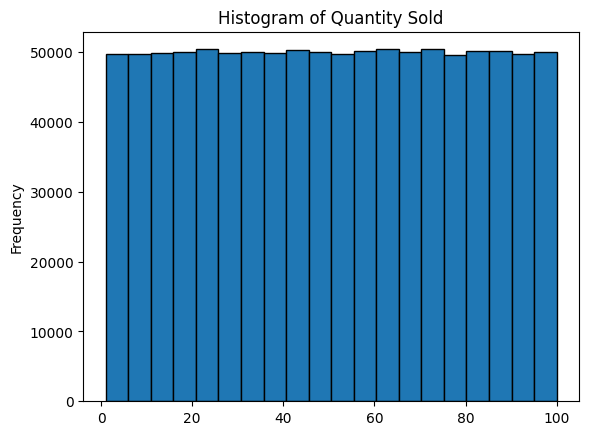

In [ ]:
# Let's observe the quantity of medication sold
df_pharm_sales['Quantity Sold'].plot.hist(bins=20,edgecolor='k')
plt.title("Histogram of Quantity Sold")
plt.show()

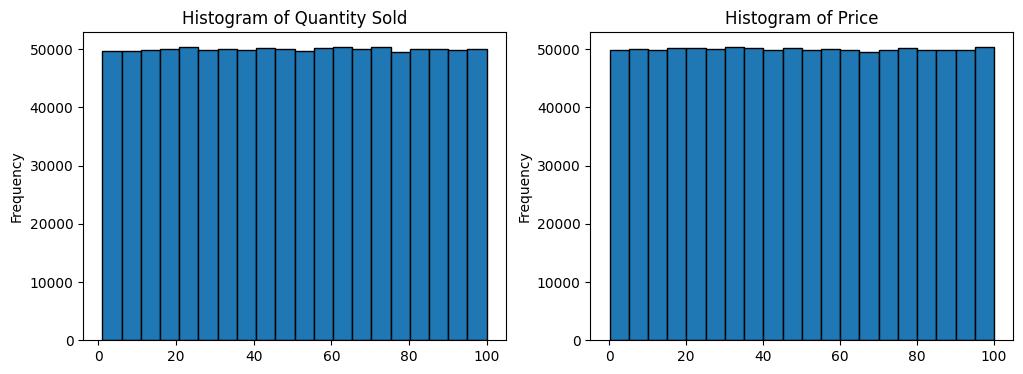

In [ ]:
# Let's practice by duplicating some basic graphs
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_pharm_sales['Quantity Sold'].plot.hist(bins=20,edgecolor='k')
plt.title("Histogram of Quantity Sold")


plt.subplot(1,2,2)
df_pharm_sales['Price'].plot.hist(bins=20,edgecolor='k')
plt.title("Histogram of Price")
plt.show()

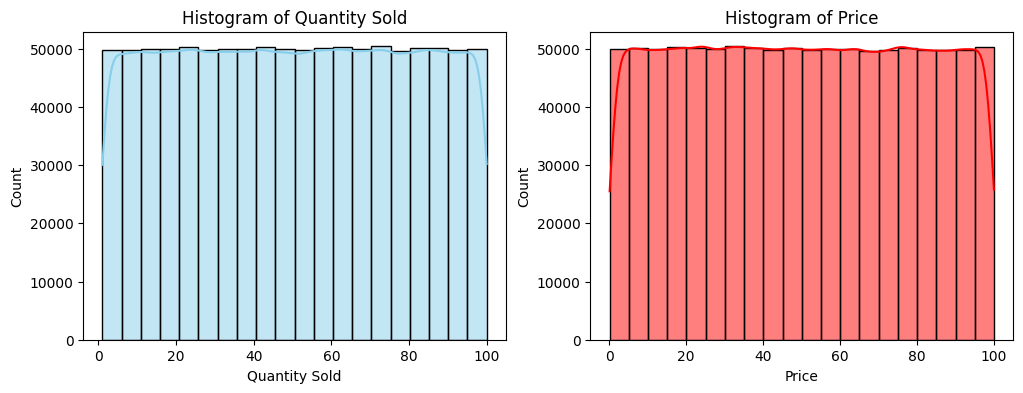

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_pharm_sales['Quantity Sold'],bins=20,kde=True,color='skyblue')
plt.title("Histogram of Quantity Sold")


plt.subplot(1,2,2)
sns.histplot(df_pharm_sales['Price'],bins=20,kde=True,color='red')
plt.title("Histogram of Price")
plt.show()

In [ ]:
# Finding how many medicines we have within our dataframe (around 279 medicines)
df_pharm_sales['Med_name'].value_counts()

,count
Med_name,
Tretinoin Topical Cream (0.025%),15027
Ketoconazole Topical Cream (2%),11008
Adapalene/Benzoyl Peroxide Topical Gel (0.1/2.5%),10097
Triamcinolone Topical Ointment (0.1%),10083
Clobetasol Topical Cream (0.05%),9984
...,...
Guanfacine Tablet (2 mg),939
Olopatadine Nasal Spray (665 mcg/spray),938
Methylphenidate Tablet (10 mg),938


In [ ]:
# Finding how many medicines classes we have within our dataframe (around 87 medicines classes)
df_pharm_sales['Med_class'].value_counts()

,count
Med_class,
Nonsteroidal Anti-Inflammatory Drug,82146
Phosphodiesterase Type 5 Inhibitor,56294
Alpha-Blocker,52208
Anticonvulsant,49766
Beta-Blocker,40673
...,...
Norepinephrine Reuptake Inhibitor,995
Melatonin Receptor Agonist,983
Cardiac Glycoside,981


What if we wanted to find the Top 20 med_class?

In [ ]:
# Defining our variable with the amount we want
top_number = 20

In [ ]:
# Finding the Top 20 med_classes
top_classes = df_pharm_sales['Med_class'].value_counts().nlargest(top_number).index
top_classes

Index([' Nonsteroidal Anti-Inflammatory Drug',
       ' Phosphodiesterase Type 5 Inhibitor', ' Alpha-Blocker',
       ' Anticonvulsant', ' Beta-Blocker', ' Antifungal', ' Corticosteroid',
       ' Benzodiazepine', ' Low-Potency Corticosteroid',
       ' High-Potency Corticosteroid', ' Opioid Analgesic', ' Antibiotic',
       ' Inhaled Corticosteroid', ' 5-Alpha Reductase Inhibitor', ' Analgesic',
       ' Prostaglandin E1 Analog', ' Retinoid', ' Sympathomimetic',
       ' Vasodilator', ' Alpha-2 Agonist'],
      dtype='object', name='Med_class')

Let's create a new dataframe in order to observe the top 20 med_classes

In [ ]:
# Creating a new df for the top 20 med_classes
df_top_med_classes = df_pharm_sales[df_pharm_sales['Med_class'].isin(top_classes)]
df_top_med_classes

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
6,2018-10-22,Norepinephrine Injection (2 mg/mL),Sympathomimetic,96,80.6
8,2022-05-19,Rofecoxib Tablet (25 mg),Nonsteroidal Anti-Inflammatory Drug,32,21.2
9,2019-07-21,Fluticasone Inhaler (50 mcg/actuation),Inhaled Corticosteroid,71,9.6
...,...,...,...,...,...
999992,2018-10-31,Carbamazepine Tablet (200 mg),Anticonvulsant,92,73.3
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3


Now within this df we only have med_classes belonging to the top 20 classes as earlier defined within our top_number. Now how can we show the top quantity sold for the top med classes?

In [ ]:
# Number of Quantity Sold for the Top 20 med_classes
df_top_med_classes = df_top_med_classes.groupby('Med_class')['Quantity Sold'].sum()
df_top_med_classes

,Quantity Sold
Med_class,
5-Alpha Reductase Inhibitor,1101549
Alpha-2 Agonist,802378
Alpha-Blocker,2625280
Analgesic,1061008
Antibiotic,1259910
Anticonvulsant,2514863
Antifungal,1819102
Benzodiazepine,1705063
Beta-Blocker,2062362


In [ ]:
# Sort the values by quantity sold in ascending order

df_top_med_classes = df_top_med_classes.sort_values(ascending=True)
df_top_med_classes

,Quantity Sold
Med_class,
Alpha-2 Agonist,802378
Vasodilator,973025
Sympathomimetic,1005189
Retinoid,1019449
Prostaglandin E1 Analog,1060112
Analgesic,1061008
5-Alpha Reductase Inhibitor,1101549
Inhaled Corticosteroid,1112097
Antibiotic,1259910


In [ ]:
# Convert Pandas Series into a Datagrame by reseting the index.
df_top_med_classes = df_top_med_classes.reset_index()

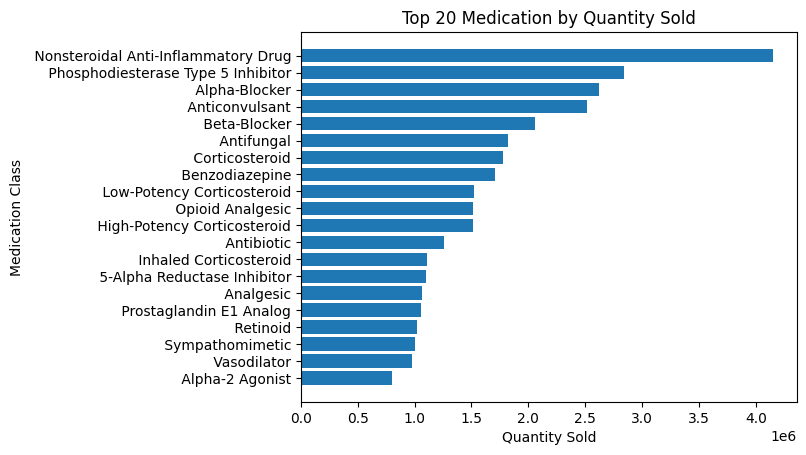

In [ ]:
# Create an bar graph ranking the Top 20 medication by quantity sold in ascending order
plt.barh(df_top_med_classes['Med_class'],df_top_med_classes['Quantity Sold'])
plt.title(f'Top {top_number} Medication by Quantity Sold')
plt.xlabel("Quantity Sold")
plt.ylabel('Medication Class')
plt.show()

Let's Create an Word Cloud of the medication classes to get a better visual understanding

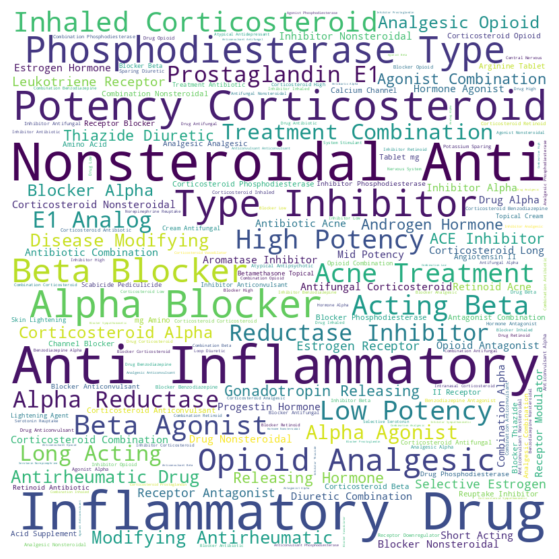

In [ ]:
# Word Cloud Diagram to observe which are the most popular medication classes
from wordcloud import WordCloud
med_class = df_pharm_sales['Med_class'].fillna('').str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(med_class)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Within the WordCloud we can see many popular medication classes such as Potency Corticosteroid, Anti inflammatory, Nonsteroidal Anti, etc. The bigger the word, the larger the representation it has within the dataframe. Let's do the same for the Medication names.

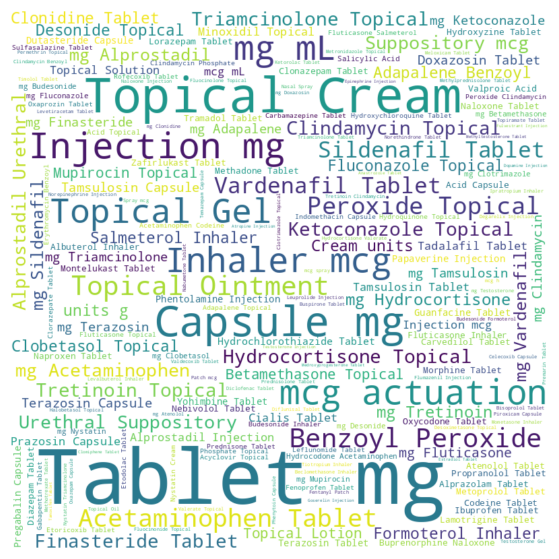

In [ ]:
# Word Cloud Diagram to observe which are the most popular medication name
from wordcloud import WordCloud
med_class = df_pharm_sales['Med_name'].fillna('').str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(med_class)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Medication Demand Forecasting

Let's use time series forecasting to leverage historical data and predict future sales trends. By analyzing past medication sales, I can make more accurate predictions about future demand, helping to optimize inventory management and ensure that medications are available when needed. This approach uses the Prophet model, which is well-suited for handling time-based data and can capture trends, seasonality, and other patterns that may influence medication sales over time.


In [1]:
def medication_quantity_forecaster(df,med_class=None,med_name=None):
  # Filter the data based on medication class or name
    if med_class:
        df_filtered = df[df['Med_class'].str.contains(med_class)]
    elif med_name:
        df_filtered = df[df['Med_name'].str.contains(med_name)]
    else:
        raise ValueError("Specify either med_name or med_class for filtering")

    # prepare the data by selecting relevant columns and renaming for Prophet model
    df_filtered = df_filtered[['Date Sold','Quantity Sold']].copy()
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.rename(columns={'Date Sold':'ds','Quantity Sold':'y'})
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])
    # Initialize and fit the Prophet forecasting model with the filtered data
    model = Prophet()
    model.fit(df_filtered)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    # Plot the overall forecast including historical and predicted data
    fig1 = model.plot(forecast)
    plt.title(f"Medication Quantity Forecast({med_class or med_name})")
    plt.xlabel("Date")
    plt.ylabel("Quantity Sold")
    plt.show()
    # Plot the individual components of the forecast (trend, seasonality, etc.)
    fig2 = model.plot_components(forecast)
    plt.show()

    return fig1, fig2

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbidfiah/qbwdj4u6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbidfiah/hwt49z5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77555', 'data', 'file=/tmp/tmprbidfiah/qbwdj4u6.json', 'init=/tmp/tmprbidfiah/hwt49z5c.json', 'output', 'file=/tmp/tmprbidfiah/prophet_modelsgr_jqfa/prophet_model-20250222213457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:34:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


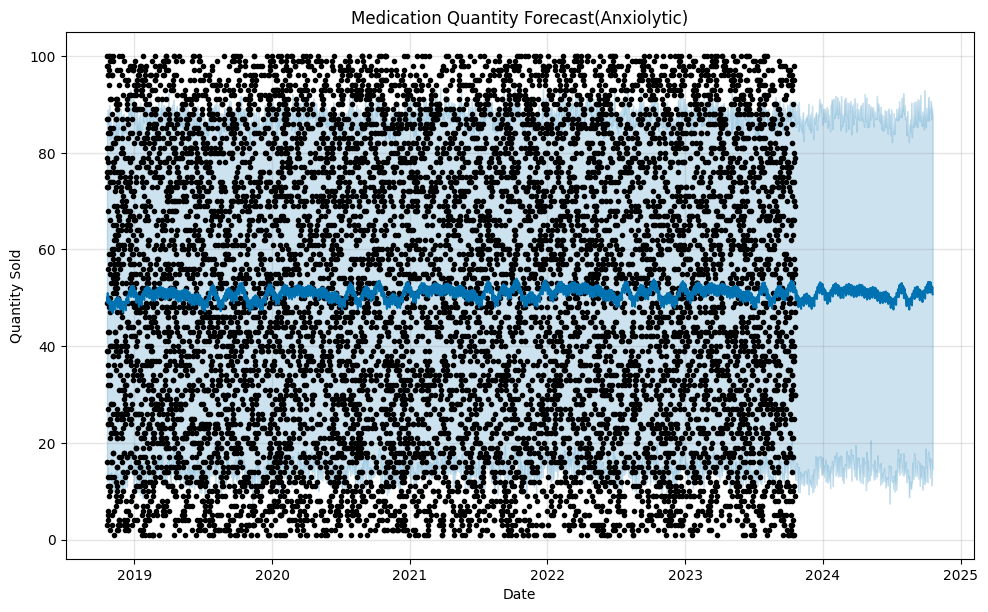

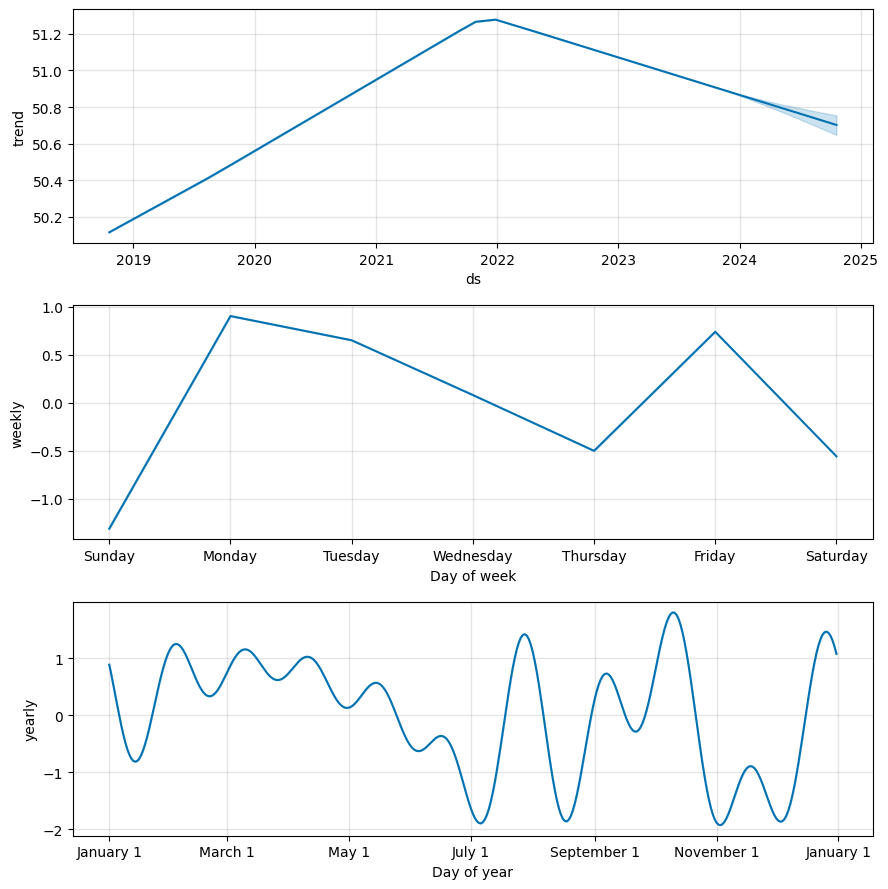

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x900 with 3 Axes>)

In [ ]:
medication_quantity_forecaster(df_pharm_sales, med_class='Anxiolytic')

# Conclusion

Based on the graphs, it appears that the medication Anxiolytic experienced a peak in sales and demand in 2022, followed by a slight decline in the subsequent year. The weekly breakdown highlights that sales are highest on Mondays and Fridays, with a noticeable drop in demand during the midweek and weekends. The yearly graph shows inconsistent sales throughout the year, with demand dipping significantly during the spring and summer months, but picking up again in the fall and winter. Overall, it seems that Anxiolytic sales are subject to seasonal fluctuations, and while demand may not be steady year-round, it tends to increase during colder months. These insights suggest a need for targeted inventory planning, with a focus on boosting availability during peak demand periods, especially in the winter.
